# Final Features extracted 


- label: This feature indicates whether the file is labeled as benign (False) or malicious (True).
- .textsize: This feature represents the size of the .text section in the PE file.
- .textentropy: This feature represents the entropy of the .text section in the PE file.
- .textvsize: This feature represents the virtual size of the .text section in the PE file.
- .datasize: This feature represents the size of the .data section in the PE file.
- .dataentropy: This feature represents the entropy of the .data section in the PE file.
- .datavsize: This feature represents the virtual size of the .data section in the PE file.
- .rsrcsize: This feature represents the size of the .rsrc section in the PE file.
- .rsrcentropy: This feature represents the entropy of the .rsrc section in the PE file.
- .rsrcvsize: This feature represents the virtual size of the .rsrc section in the PE file.
- machine: This feature represents the type of machine for which the file is intended.
- subsystem: This feature represents the target subsystem for the PE file.
- generalsize: This feature represents the size of the general file information in the PE header.
- generalvsize: This feature represents the virtual size of the general file information in the PE header.
- generalhas_debug: This feature indicates whether the PE file has a debug section (True) or not (False).
- generalexports: This feature represents the number of exported functions in the PE file.
- generalimports: This feature represents the number of imported functions in the PE file.
- generalhas_relocations: This feature indicates whether the PE file has relocation information (True) or not (False).
- generalhas_resources: This feature indicates whether the PE file has resource information (True) or not (False).
- generalhas_signature: This feature indicates whether the PE file has a digital signature (True) or not (False).
- generalhas_tls: This feature indicates whether the PE file has thread local storage (TLS) information (True) or not (False).
- generalsymbols: This feature represents the number of symbols in the PE file.
- stringsnumstrings: This feature represents the number of printable strings in the PE file.
- stringsavlength: This feature represents the average length of the printable strings in the PE file.
- stringsprintabledist: This feature represents the histogram of printable characters within the printable strings.
- stringsprintables: This feature indicates whether the PE file contains printable strings (True) or not (False).
- stringsentropy: This feature represents the entropy of characters across all printable strings.
- stringspaths: This feature represents the number of strings that begin with "C:\" indicating paths.
- stringsurls: This feature represents the number of strings that contain "http://" or "https://" indicating URLs.
- stringsregistry: This feature represents the number of strings that contain "HKEY_" indicating registry keys.
- stringsMZ: This feature represents the number of strings that contain "MZ" indicating Windows PE droppers or bundled executables.
- cofftimestamp: This feature represents the timestamp in the COFF header of the PE file.
- coffmachine: This feature represents the target machine for which the PE file is intended.
- coffcharacteristics: This feature represents a list of image characteristics of the PE file.
- optionalsubsystem: This feature represents the target subsystem specified in the optional header of the PE file.
- optionaldll_characteristics: This feature represents a list of DLL characteristics of the PE file.
- optionalmagic: This feature represents the magic value in the optional header of the PE file.
- optionalmajor_image_version: This feature represents the major image version specified in the optional header of the PE file.
- optionalminor_image_version: This feature represents the minor image version specified in the optional header of the PE file.
- optionalmajor_linker_version: This feature represents the major linker version specified in the optional header of the PE file.
- optionalminor_linker_version: This feature represents the minor linker version specified in the optional header of the PE file.
- optionalmajor_operating_system_version: This feature represents the major operating system version specified in the optional header of the PE file.
- optionalminor_operating_system_version: This feature represents the minor operating system version specified in the optional header of the PE file.
- optionalmajor_subsystem_version: This feature represents the major subsystem version specified in the optional header of the PE file.
- optionalminor_subsystem_version: This feature represents the minor subsystem version specified in the optional header of the PE file.
- optionalsizeof_code: This feature represents the size of the code section specified in the optional header of the PE file.
- optionalsizeof_headers: This feature represents the size of the headers specified in the optional header of the PE file.
- optionalsizeof_heap_commit: This feature represents the size of the committed heap specified in the optional header of the PE file.


# Dependencies

In [1]:
# %pip install scikit-learn 
# %pip install matplotlib
# %pip install scipy 
# %pip install keras 
# %pip install seaborn
# %pip install tensorflow
# %pip install scikeras
# %pip instlal joblib


# Library Imports 


In [1]:
# import all the required libraries in this place

import json
import csv
import threading

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split, learning_curve, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scikeras.wrappers import KerasClassifier

import xgboost as xgb
from scipy.stats import randint

import tensorflow as tf


from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model
from keras import regularizers
from keras import backend as K
import sklearn.model_selection as model_selection

import joblib

model_selection.StratifiedKFold





2023-09-06 09:54:58.244466: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-09-06 09:54:58.296077: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-06 09:54:58.539880: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-06 09:54:58.541279: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-06 09:54:59.637397: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

sklearn.model_selection._split.StratifiedKFold

# Loading  Dataset


In [2]:
#Function to load data set
def load_dataset_from_jsonl(file_path, file_idx_start=0, file_idx_end=0, testing=False):
    def load_file(file_idx):
        dataset = []
        path = file_path
        if not testing:
            path += '_' + str(file_idx)
        path += '.jsonl'
        with open(path, 'r') as file:
            for line in file:
                data = json.loads(line)
                dataset.append(data)
        return dataset

    threads = []

    for i in range(file_idx_start, file_idx_end + 1):
        thread = threading.Thread(target=load_file, args=(i,))
        threads.append(thread)
        thread.start()

    for thread in threads:
        thread.join()

    combined_dataset = []
    for thread in threads:
        combined_dataset.extend(thread.result())

    return combined_dataset


FILE_PATH_TRAINING = '../../dataset/ember2018/train_features'
FILE_PATH_TESTING = '../../dataset/ember2018/test_features'


dataset_training = load_dataset_from_jsonl(FILE_PATH_TRAINING,0,5)
dataset_testing = load_dataset_from_jsonl(FILE_PATH_TESTING,testing=True)




## Flattening the json objects


In [ ]:
def extract_features(feature, feature_name, features):
    
    for key, value in feature.items(): 
        
        string_name = feature_name + '' + key
        if string_name not in features:
            features[string_name]= []
        
        if isinstance(value, int) or isinstance(value, float):
            features[string_name].append(value)
        else:
            features[string_name].append(None)
    

def extract_features_from_dataset_to_dataframe(dataset):
    
    features= {}
    features['label']=[]

    section_names = ['.text', '.data', '.rsrc']
    feature_names = ['size', 'entropy', 'vsize']

    for section in section_names:
        for feature in feature_names:
            features[section + feature] = []

    features['machine']=[]
    features['subsystem']=[]


    for data in dataset:
        
        if data['label'] == -1:
            continue

        #all sections should be equal to 1    
        section_count_list = {'.text':0, '.data':0, '.rsrc':0}
        for item in data['section']['sections']:
            
            if item['name'] in section_names:
                section_count_list[item['name']]+=1
        
        check = False
        for key,value in section_count_list.items():
            if value!=1:
                check=True
                break
        
        if check:
            continue
            
        feature_names = ['size', 'entropy', 'vsize']
            
        for item in data['section']['sections']:

            if item['name'] in section_names:
                
                for feature in feature_names:
                    val = item[feature] if item[feature]!=None else None
                    features[item['name'] + feature].append(val)
        
        feature_names = ['general', 'strings']

        for feature in feature_names:
            extract_features(data[feature], feature,features)

        for item in data['header']:
            extract_features(data['header'][item], item,features)
        
        features['machine'].append(data['header']['coff']['machine'])
        features['subsystem'].append(data['header']['optional']['subsystem'])
        
        
        features['label'].append(data['label'])

    df = pd.DataFrame(features)
    print(df['label'].value_counts())
    return df


df_training = extract_features_from_dataset_to_dataframe(dataset_training)
df_testing = extract_features_from_dataset_to_dataframe(dataset_testing)

label
0    21167
Name: count, dtype: int64
label
0    57489
1    52790
Name: count, dtype: int64


## Removing null columns from dataframes

In [ ]:
df_training.dropna(how='all', axis=1, inplace=True)
df_testing.dropna(how='all', axis=1, inplace=True)

## Encoding non integer columns

In [ ]:

columns_to_encode = ['machine', 'subsystem']

df_training = pd.get_dummies(df_training, columns=columns_to_encode)
df_testing = pd.get_dummies(df_testing, columns=columns_to_encode)


## Standardization

In [ ]:
# Columns to exclude from standardization
def standardize(df):
    exclude_columns= [
    "machine", "subsystem", "label"
    ]

    df_standardized = df.copy()
    scaler = StandardScaler()

    for column in df.columns:
        if all([ x not in column for x in exclude_columns]):
            # Standardize the column
            df_standardized[column] = scaler.fit_transform(df[column].values.reshape(-1, 1))

    return df_standardized

df_training_standardized = standardize(df_training)
df_testing_standardized = standardize(df_testing)

## Saving to csv 

In [ ]:
df_training.to_csv('../filtered-data/original/training.csv',index= False)
df_testing.to_csv('../filtered-data/original/testing.csv',index= False)
df_training_standardized.to_csv('../filtered-data/standardized/training.csv',index= False)
df_testing_standardized.to_csv('../filtered-data/standardized/testing.csv',index= False)

# Column distributions

In [19]:
print("Training",df_training.var(),sep = "\n")

label                                     0.000000e+00
.textsize                                 5.780770e+12
.textentropy                              3.708292e-01
.textvsize                                5.861784e+12
.datasize                                 1.959326e+11
.dataentropy                              3.078977e+00
.datavsize                                5.310996e+13
.rsrcsize                                 7.510589e+13
.rsrcentropy                              2.280339e+00
.rsrcvsize                                6.258211e+13
machine                                   1.615638e+00
subsystem                                 8.923508e-01
generalsize                               9.197046e+13
generalvsize                              2.675454e+14
generalhas_debug                          2.454571e-01
generalexports                            8.262714e+05
generalimports                            1.150984e+05
generalhas_relocations                    2.224109e-01
generalhas

In [6]:
df_training.describe()

,label,.textsize,.textentropy,.textvsize,.datasize,.dataentropy,.datavsize,.rsrcsize,.rsrcentropy,.rsrcvsize,...,optionalminor_image_version,optionalmajor_linker_version,optionalminor_linker_version,optionalmajor_operating_system_version,optionalminor_operating_system_version,optionalmajor_subsystem_version,optionalminor_subsystem_version,optionalsizeof_code,optionalsizeof_headers,optionalsizeof_heap_commit
count,21167.0,2.116700e+04,21167.000000,2.116700e+04,2.116700e+04,21167.000000,2.116700e+04,2.116700e+04,21167.000000,2.116700e+04,...,21167.000000,21167.000000,21167.000000,21167.000000,21167.000000,21167.000000,21167.000000,2.116700e+04,21167.000000,2.116700e+04
mean,0.0,6.209248e+05,6.231112,6.261426e+05,4.528638e+04,2.952574,3.626435e+05,5.766655e+05,4.604833,5.148744e+05,...,31.231729,8.362026,4.671848,5.195398,0.339869,4.859073,0.565503,6.304398e+05,1928.987575,1.022258e+05
std,0.0,2.404323e+06,0.608957,2.421112e+06,4.426428e+05,1.754701,7.287658e+06,8.666365e+06,1.510079,7.910886e+06,...,763.238647,3.958568,10.039732,1.791528,1.125940,1.211824,1.730535,2.425366e+06,5086.098020,1.425359e+07
min,0.0,0.000000e+00,-0.000000,0.000000e+00,0.000000e+00,-0.000000,0.000000e+00,0.000000e+00,-0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,0.0,2.867200e+04,6.095042,2.843200e+04,1.024000e+03,1.703726,2.776000e+03,1.536000e+03,3.431639,1.300000e+03,...,0.000000,6.000000,0.000000,4.000000,0.000000,4.000000,0.000000,2.867200e+04,1024.000000,4.096000e+03
50%,0.0,1.141760e+05,6.399496,1.139520e+05,4.096000e+03,2.988031,1.021200e+04,8.192000e+03,4.309580,7.412000e+03,...,0.000000,8.000000,0.000000,5.000000,0.000000,5.000000,0.000000,1.157120e+05,1024.000000,4.096000e+03
75%,0.0,3.852800e+05,6.533343,3.877995e+05,1.280000e+04,4.349554,3.660000e+04,1.064960e+05,5.200150,9.909400e+04,...,0.000000,11.000000,2.000000,6.000000,0.000000,5.000000,1.000000,3.891200e+05,2048.000000,4.096000e+03
max,0.0,6.515558e+07,7.999927,6.515509e+07,3.939942e+07,7.997918,4.996452e+08,7.010970e+08,7.999993,7.011000e+08,...,23001.000000,83.000000,250.000000,10.000000,51.000000,19.000000,90.000000,6.515558e+07,275456.000000,2.073742e+09


/tmp/ipykernel_23140/1971688785.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
/home/vishnusai/.local/lib/python3.10/site-packages/seaborn/distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


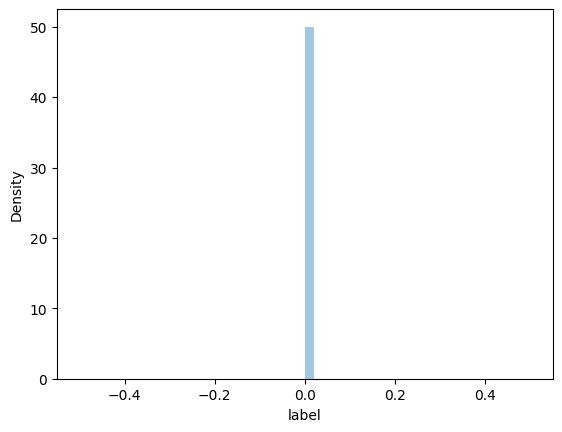

/tmp/ipykernel_23140/1971688785.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


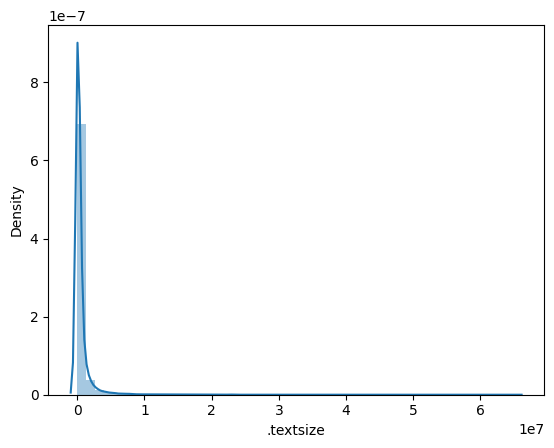

/tmp/ipykernel_23140/1971688785.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


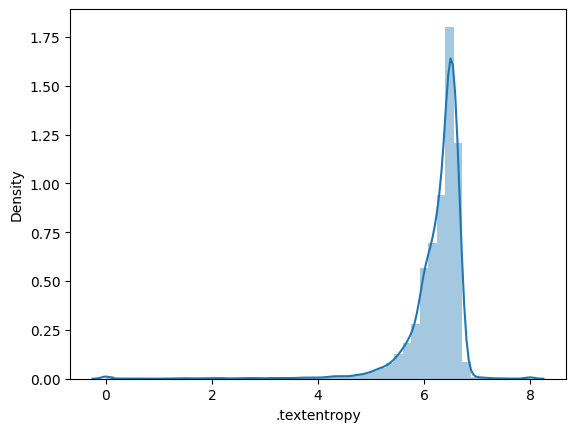

/tmp/ipykernel_23140/1971688785.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


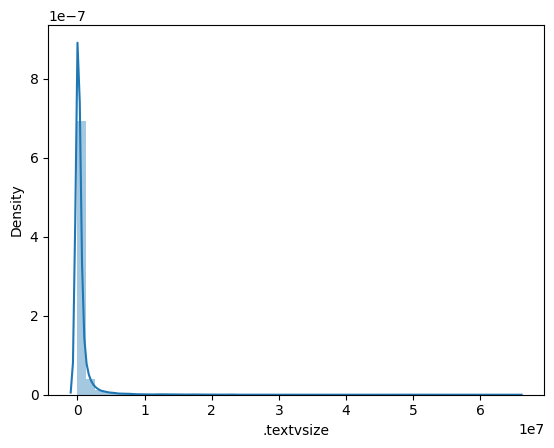

/tmp/ipykernel_23140/1971688785.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


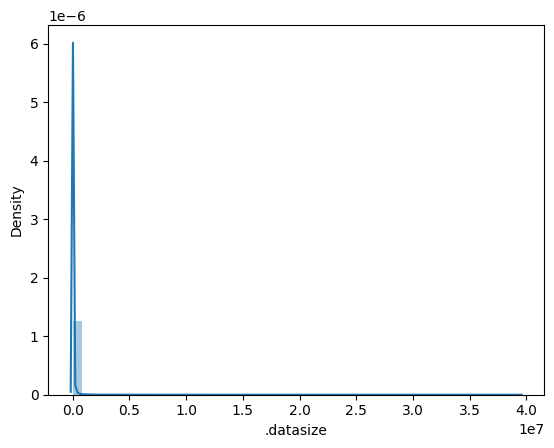

/tmp/ipykernel_23140/1971688785.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


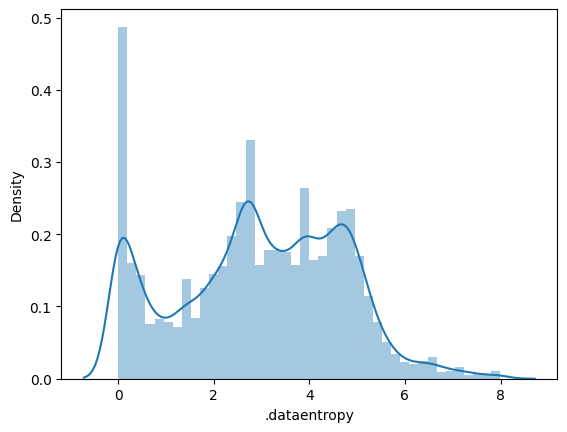

/tmp/ipykernel_23140/1971688785.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


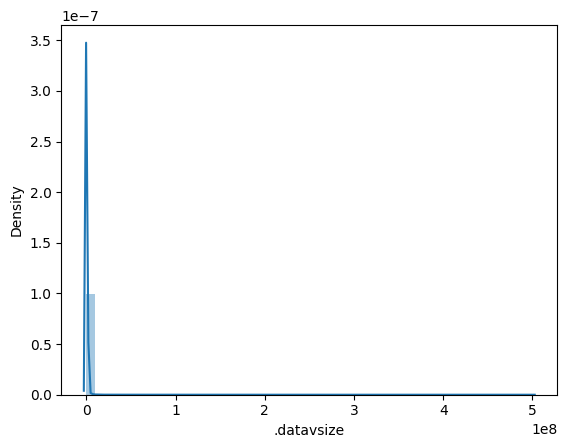

/tmp/ipykernel_23140/1971688785.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


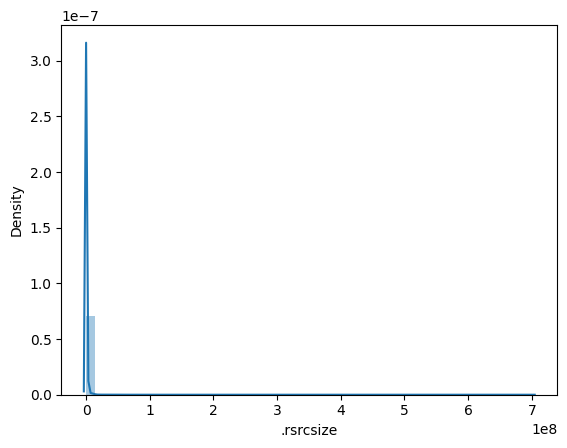

/tmp/ipykernel_23140/1971688785.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


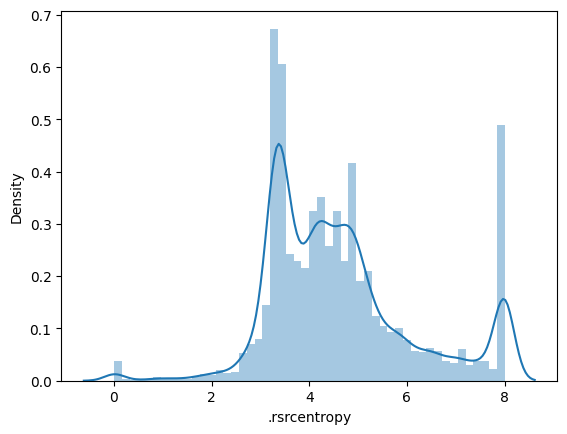

/tmp/ipykernel_23140/1971688785.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


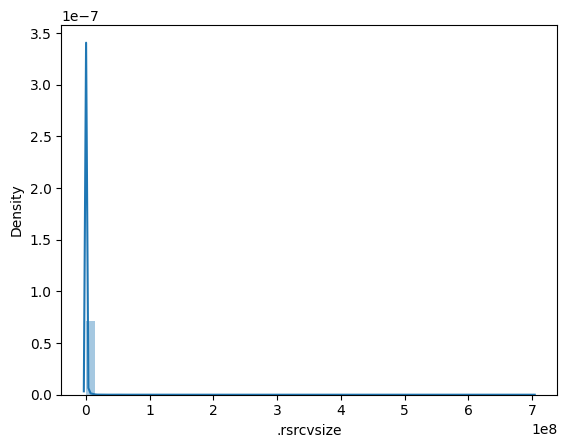

/tmp/ipykernel_23140/1971688785.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


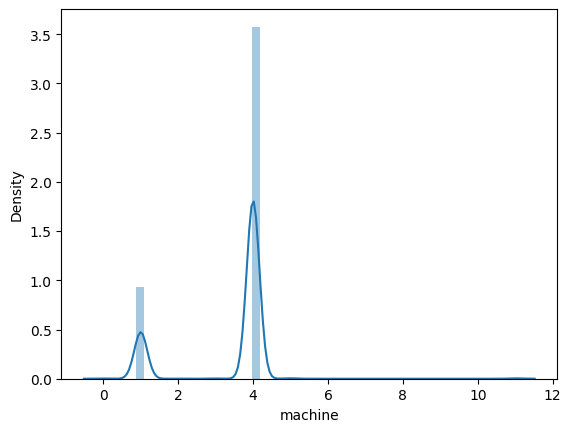

/tmp/ipykernel_23140/1971688785.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


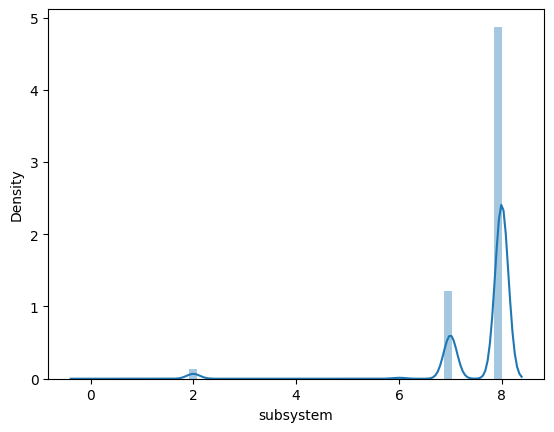

/tmp/ipykernel_23140/1971688785.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


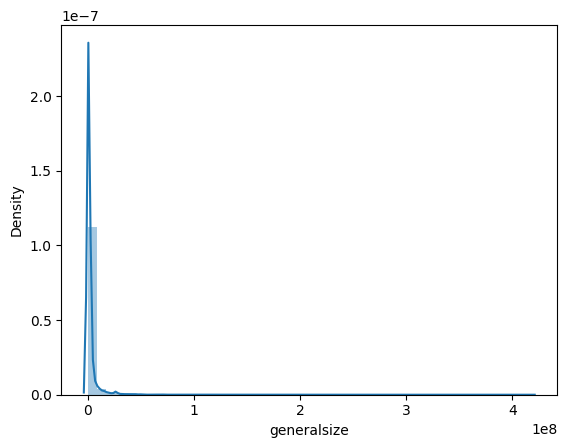

/tmp/ipykernel_23140/1971688785.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


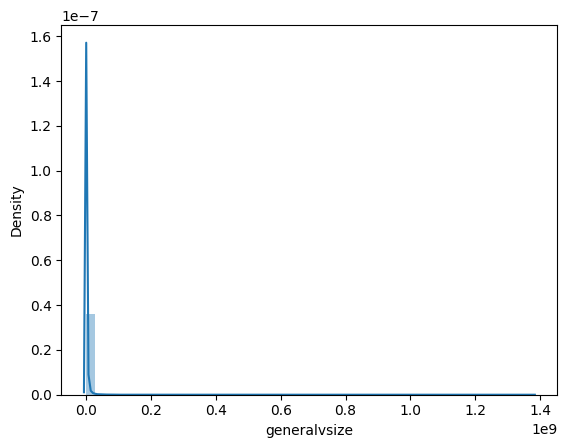

/tmp/ipykernel_23140/1971688785.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


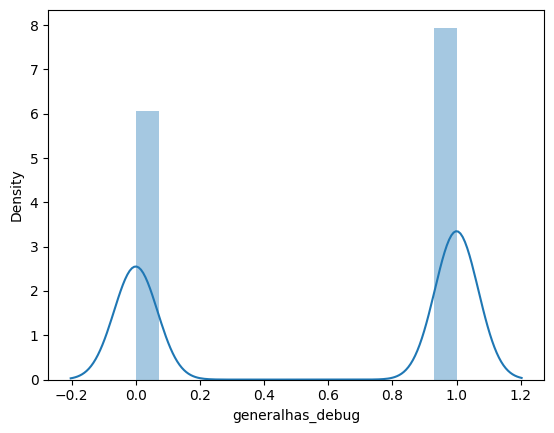

/tmp/ipykernel_23140/1971688785.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


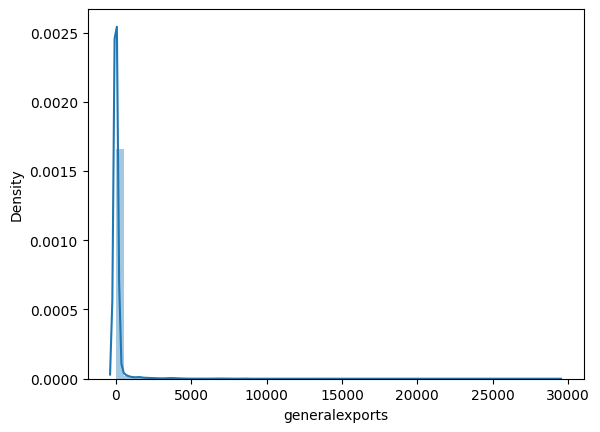

/tmp/ipykernel_23140/1971688785.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


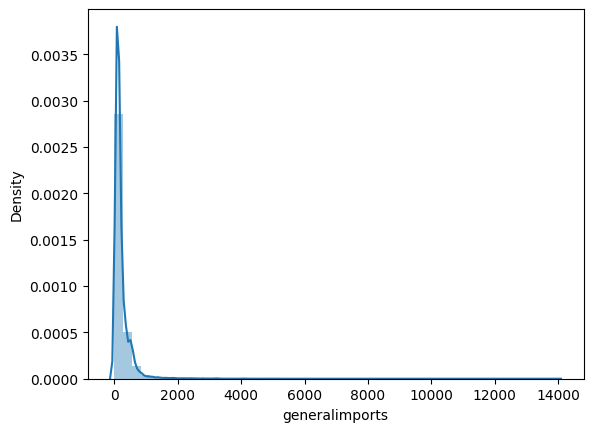

/tmp/ipykernel_23140/1971688785.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


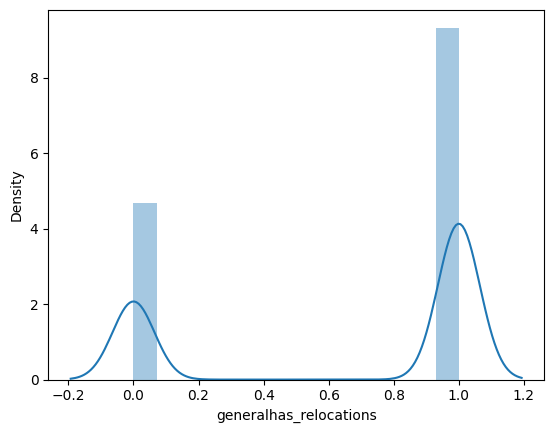

/tmp/ipykernel_23140/1971688785.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


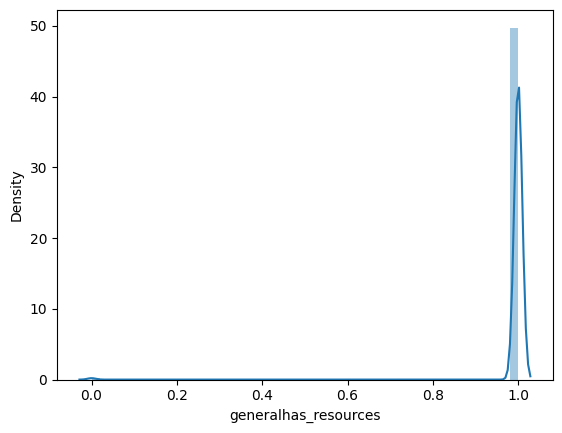

/tmp/ipykernel_23140/1971688785.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


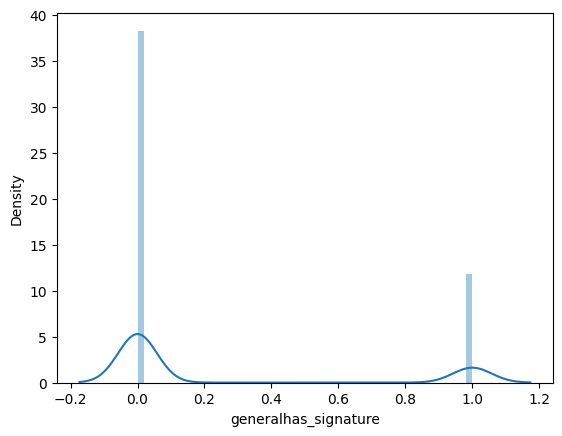

/tmp/ipykernel_23140/1971688785.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


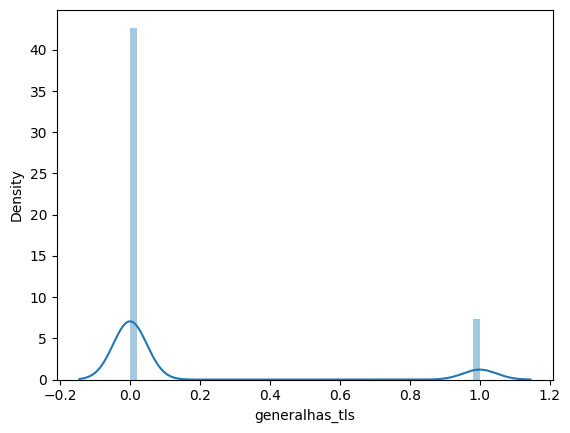

/tmp/ipykernel_23140/1971688785.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


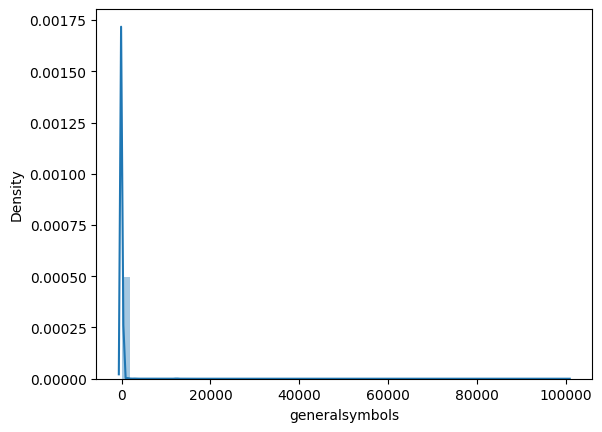

/tmp/ipykernel_23140/1971688785.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


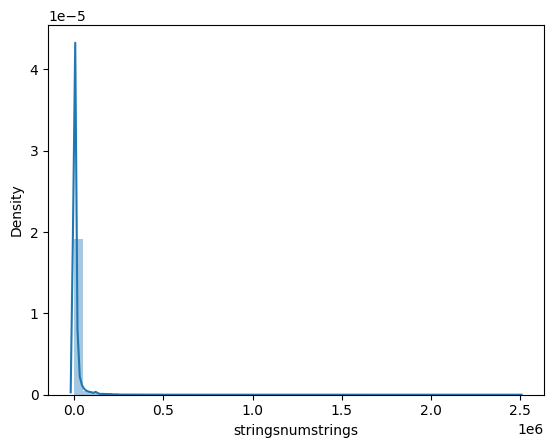

/tmp/ipykernel_23140/1971688785.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


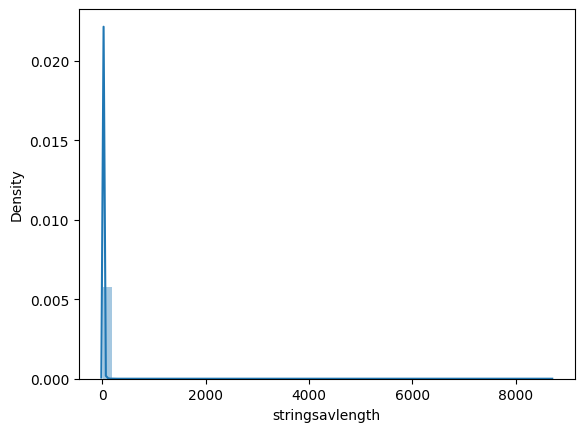

/tmp/ipykernel_23140/1971688785.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


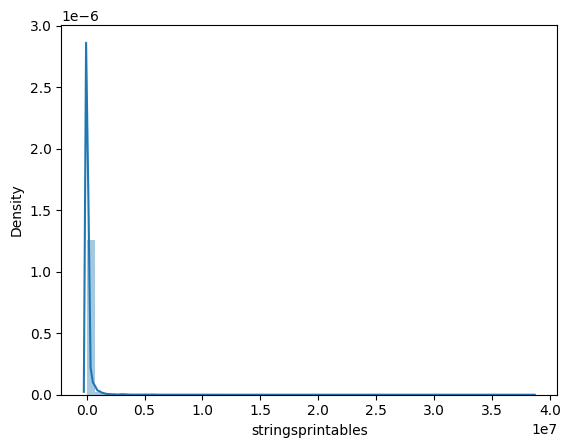

/tmp/ipykernel_23140/1971688785.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


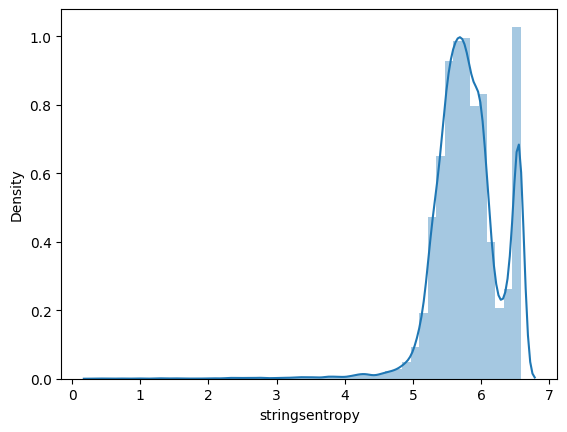

/tmp/ipykernel_23140/1971688785.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


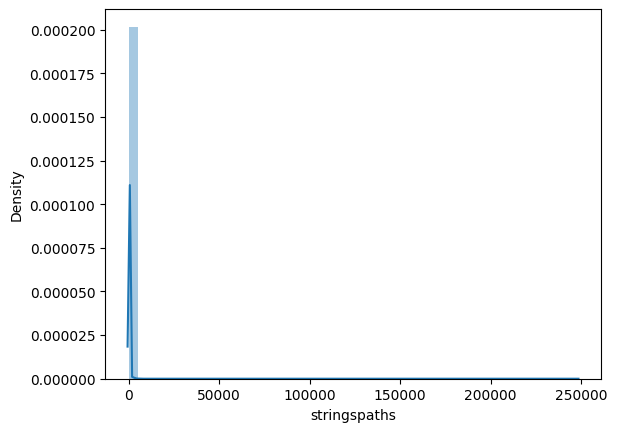

/tmp/ipykernel_23140/1971688785.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


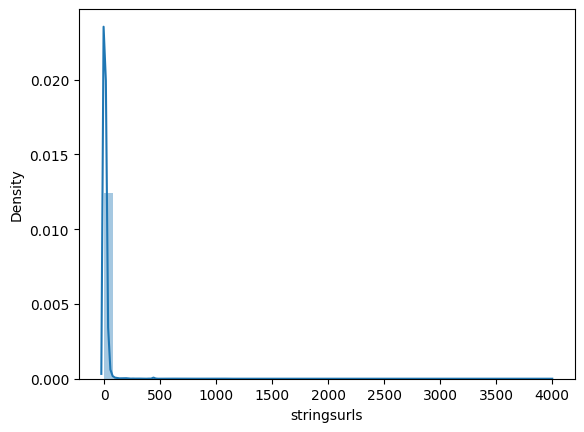

/tmp/ipykernel_23140/1971688785.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


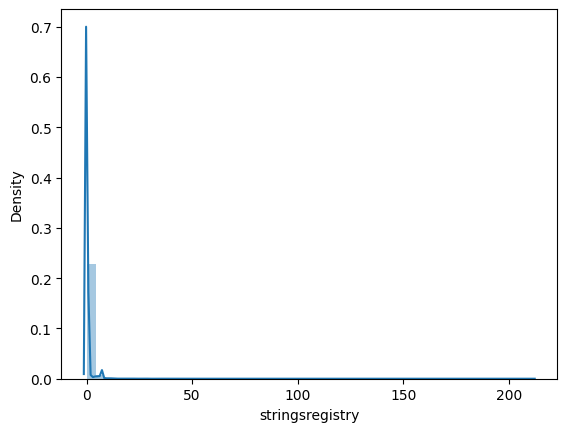

/tmp/ipykernel_23140/1971688785.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


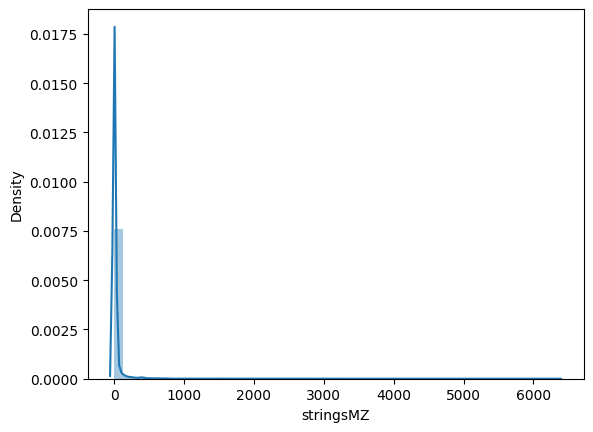

/tmp/ipykernel_23140/1971688785.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


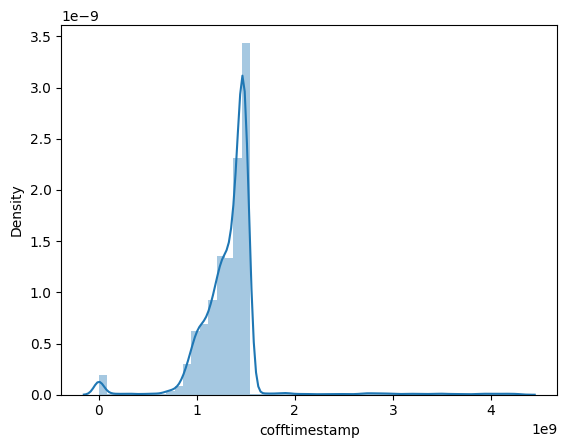

/tmp/ipykernel_23140/1971688785.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


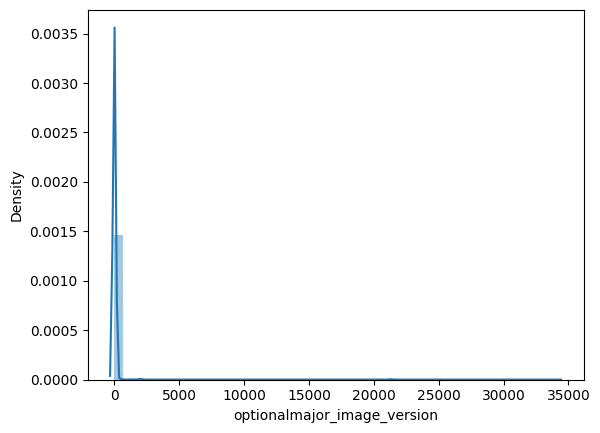

/tmp/ipykernel_23140/1971688785.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


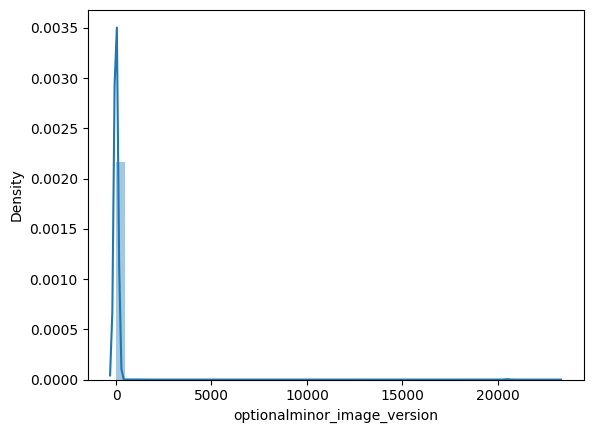

/tmp/ipykernel_23140/1971688785.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


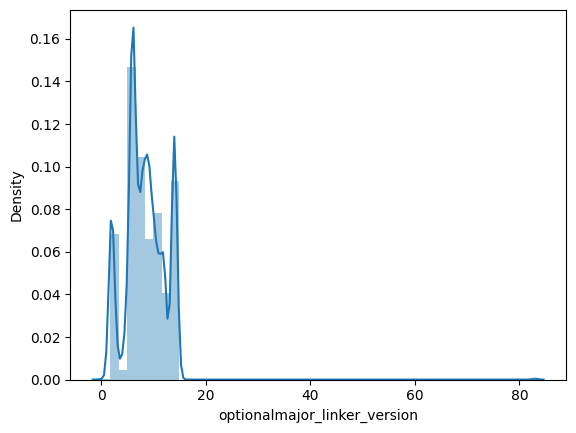

/tmp/ipykernel_23140/1971688785.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


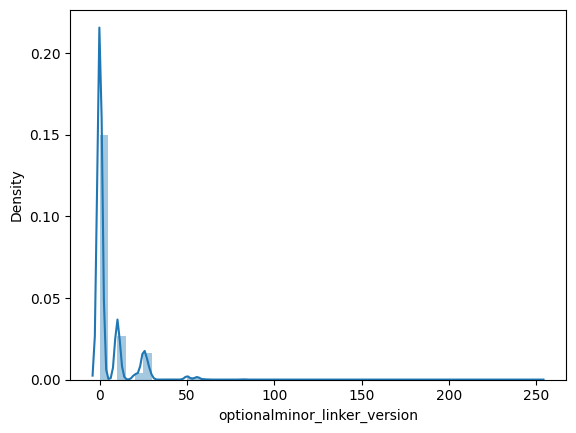

/tmp/ipykernel_23140/1971688785.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


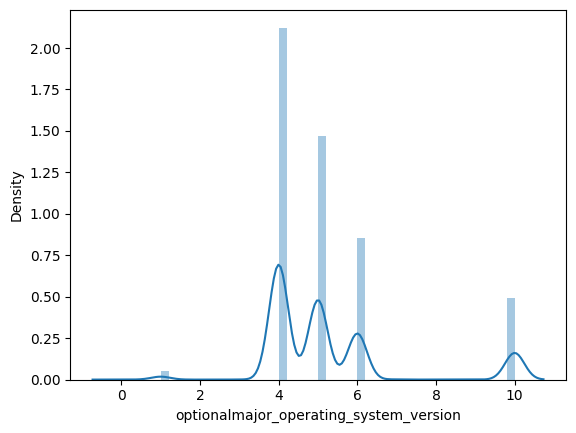

/tmp/ipykernel_23140/1971688785.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


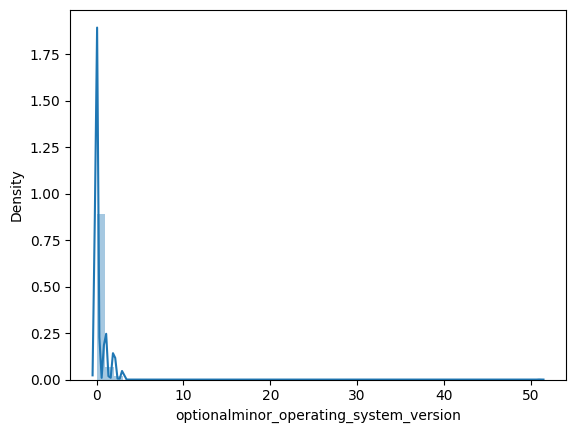

/tmp/ipykernel_23140/1971688785.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


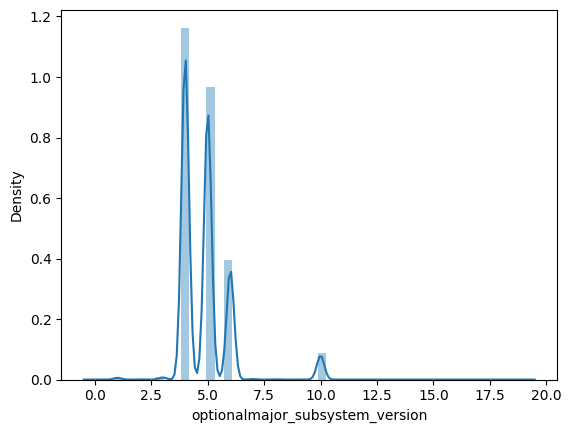

/tmp/ipykernel_23140/1971688785.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


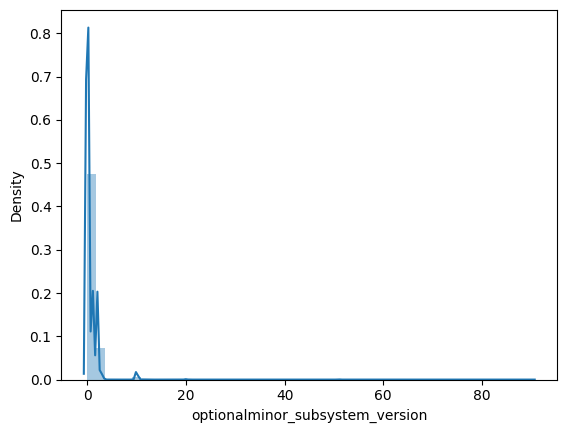

/tmp/ipykernel_23140/1971688785.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


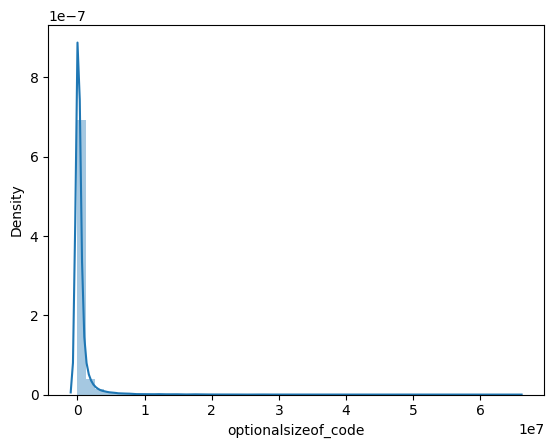

/tmp/ipykernel_23140/1971688785.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


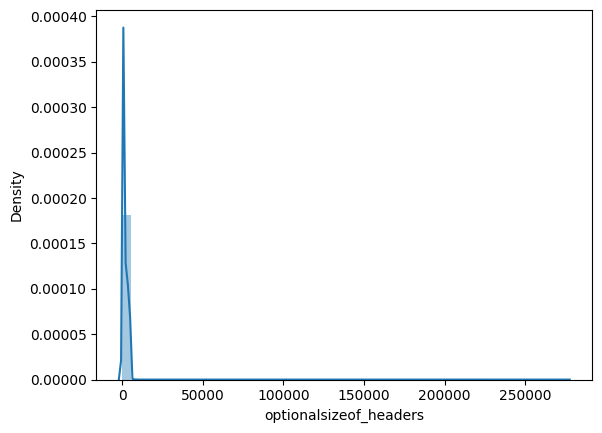

/tmp/ipykernel_23140/1971688785.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


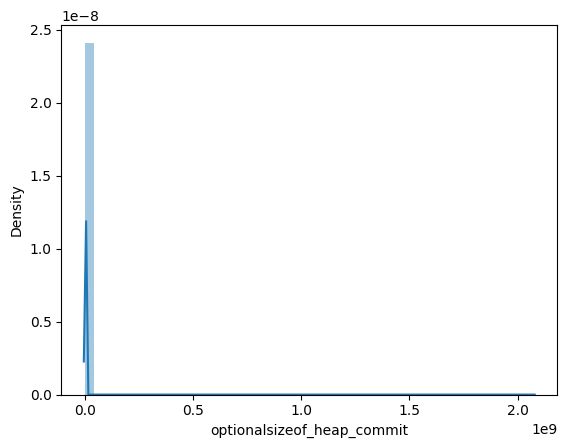

In [7]:
#plot normal distribution of features
def plot_normal_distribution(df):
    for column in df.columns:
        sns.distplot(df[column])
        plt.show()
        
plot_normal_distribution(df_training)

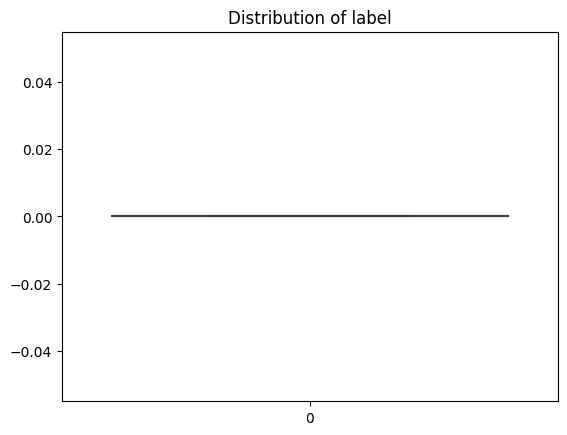

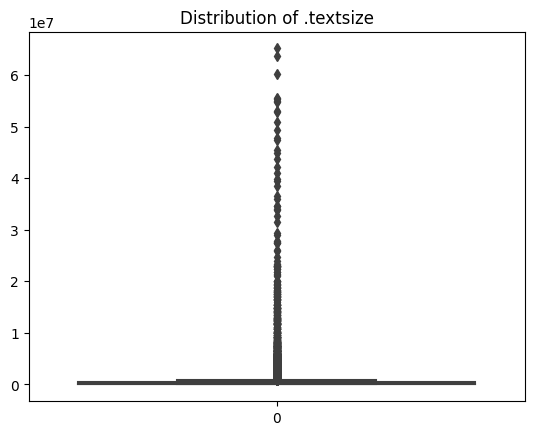

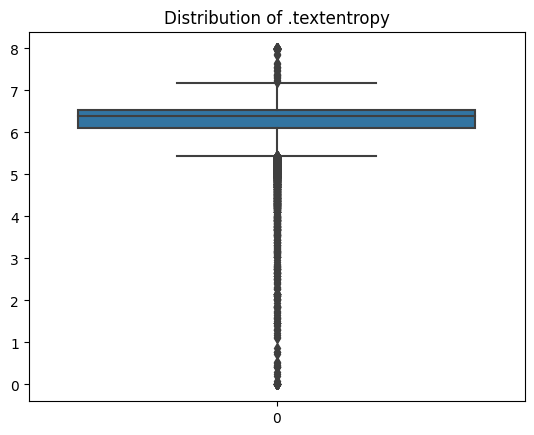

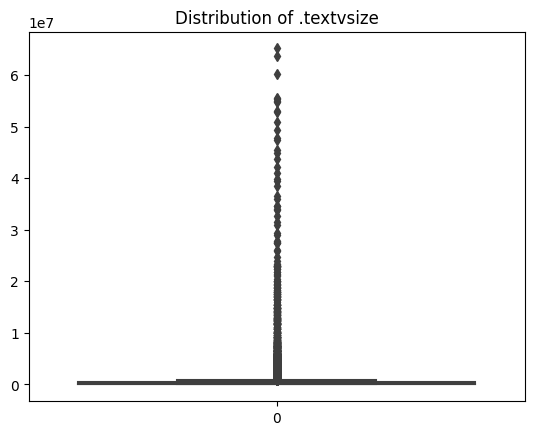

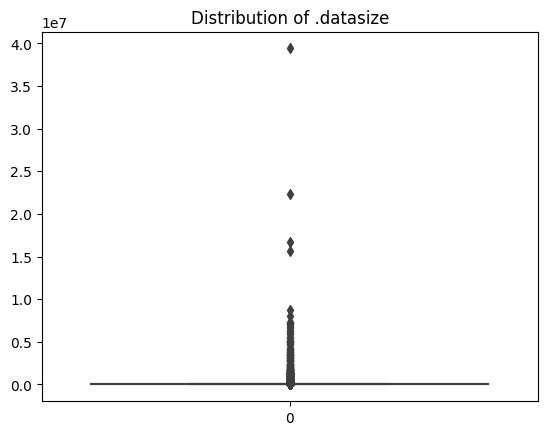

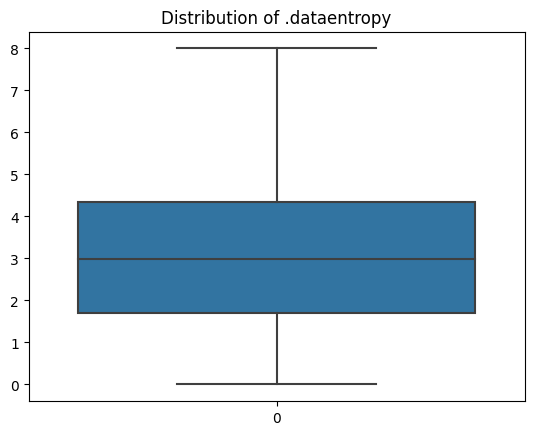

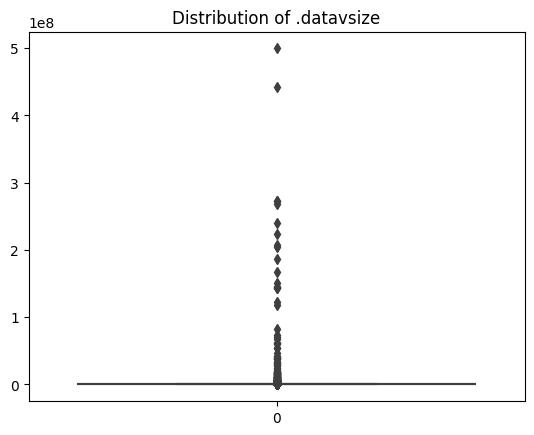

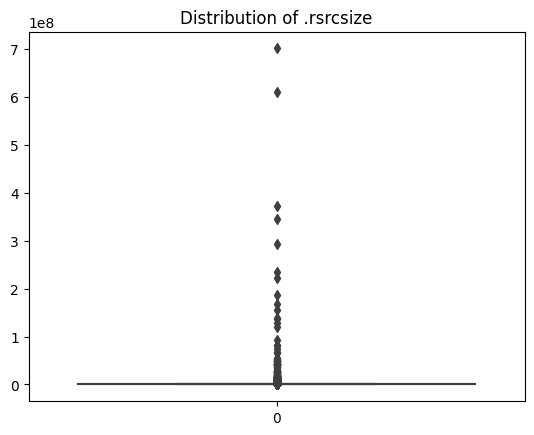

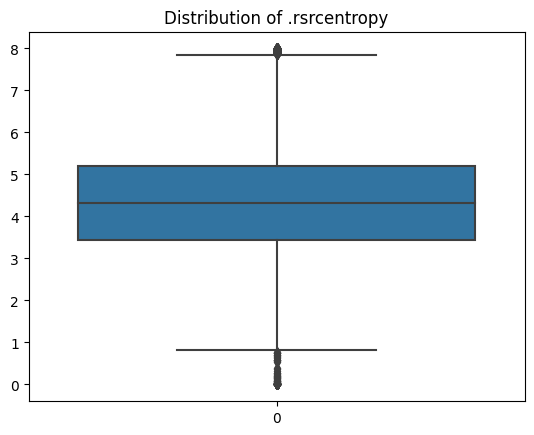

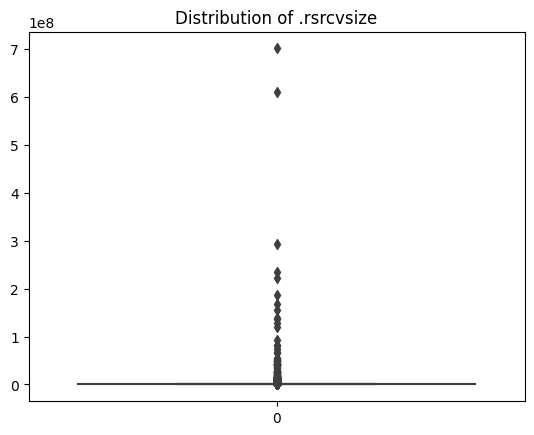

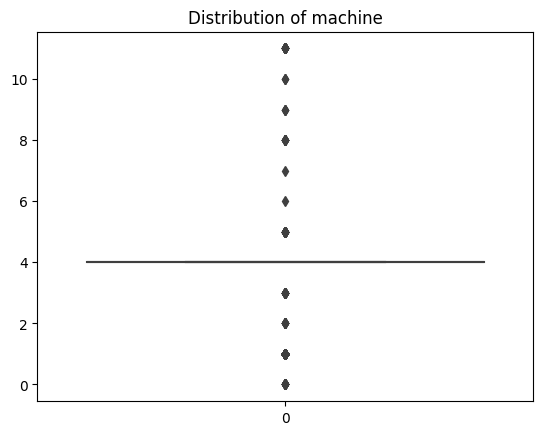

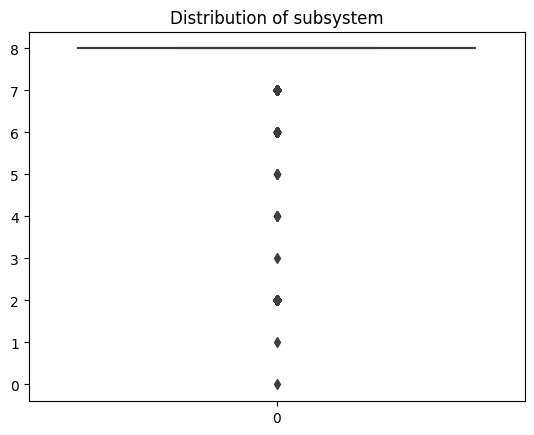

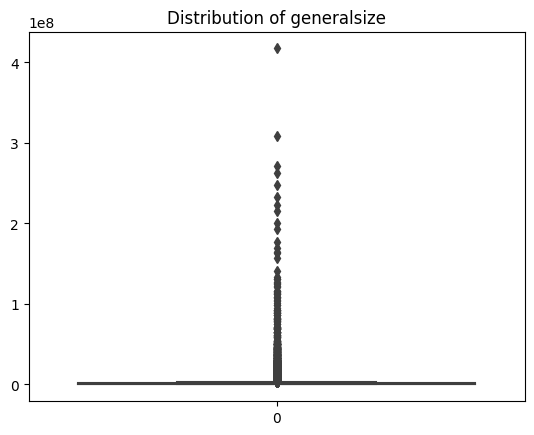

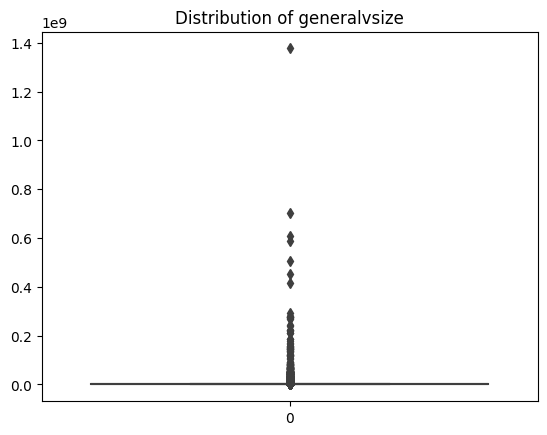

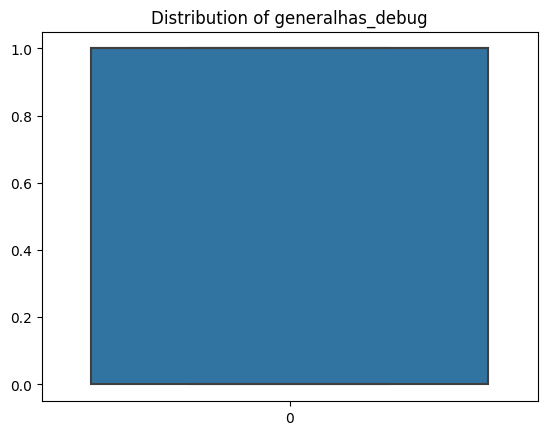

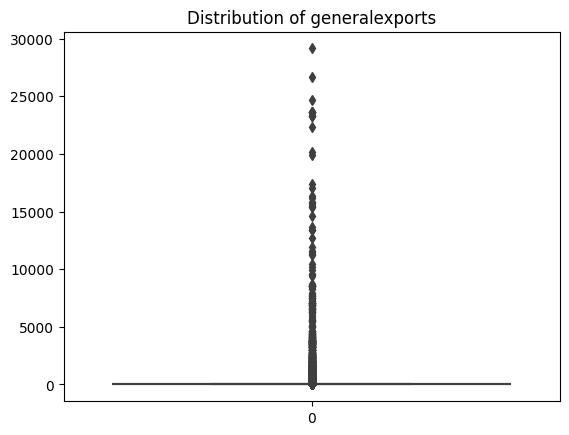

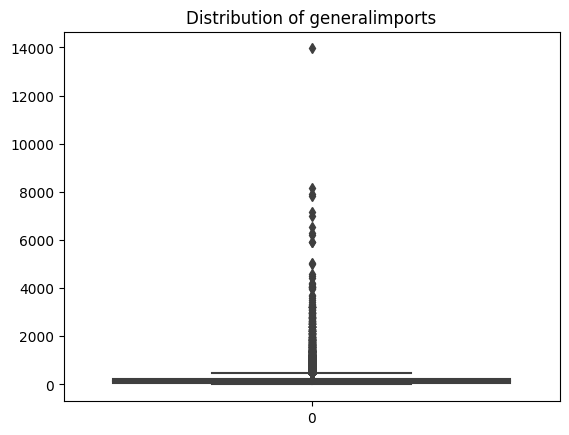

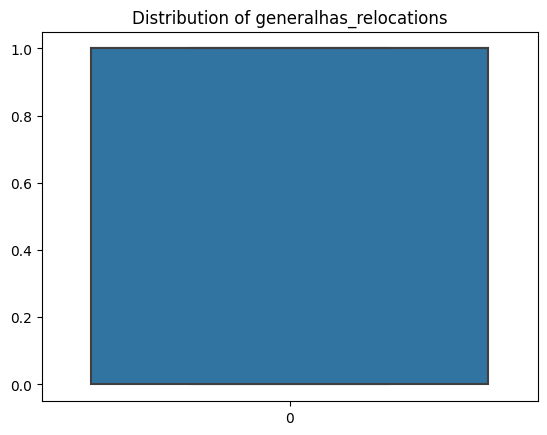

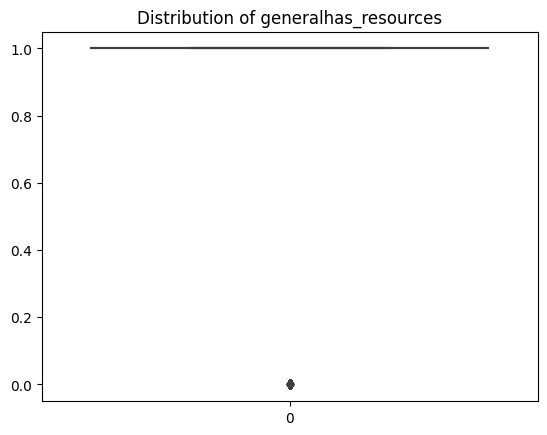

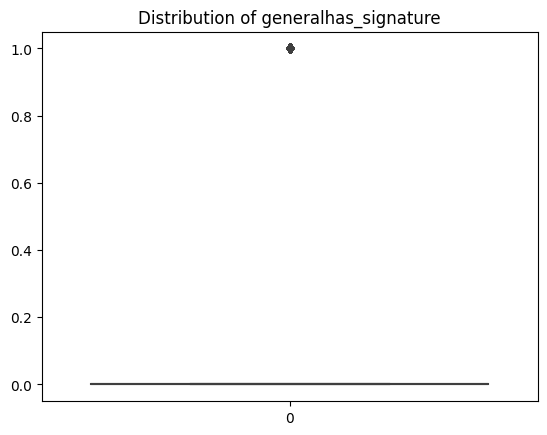

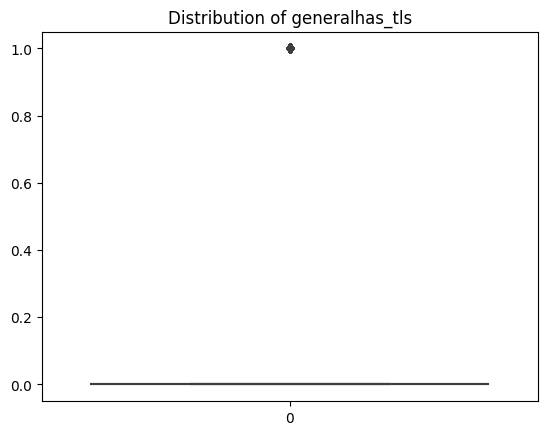

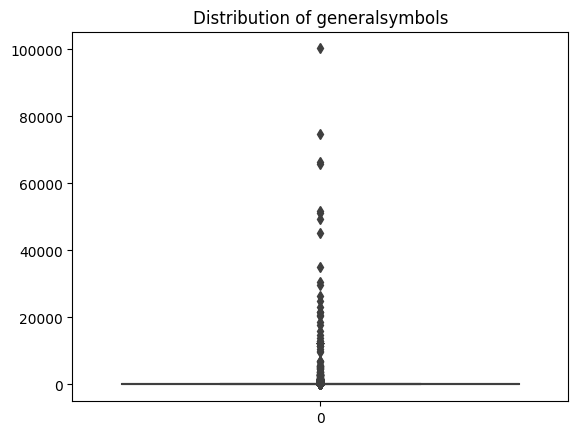

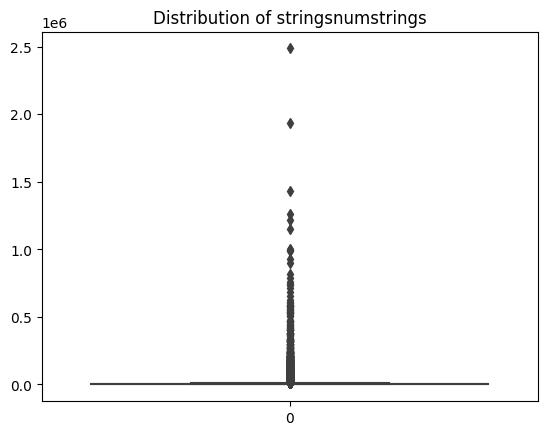

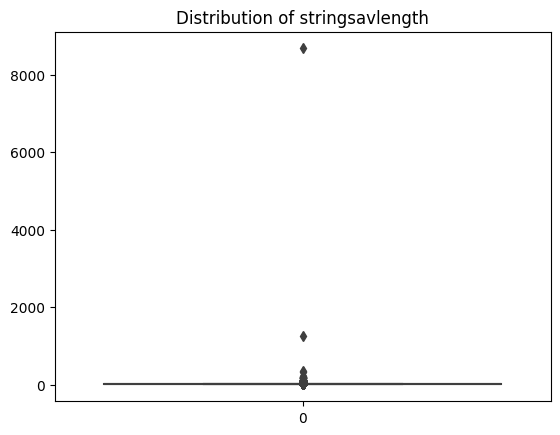

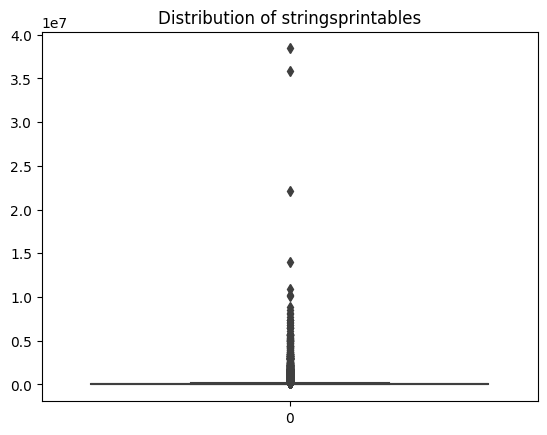

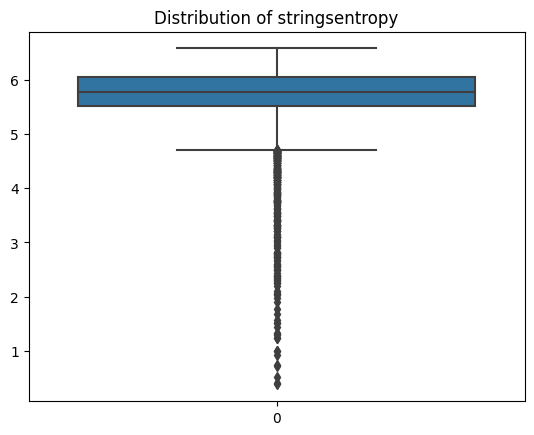

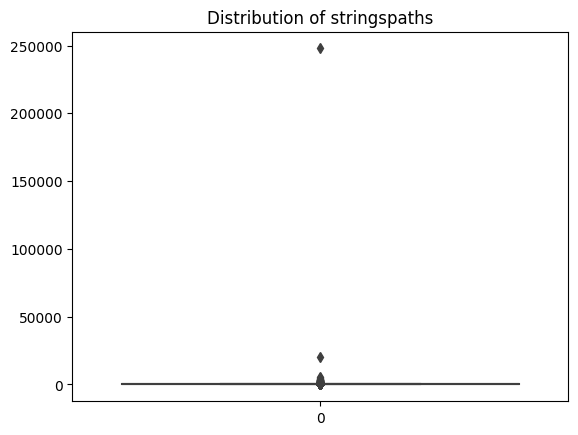

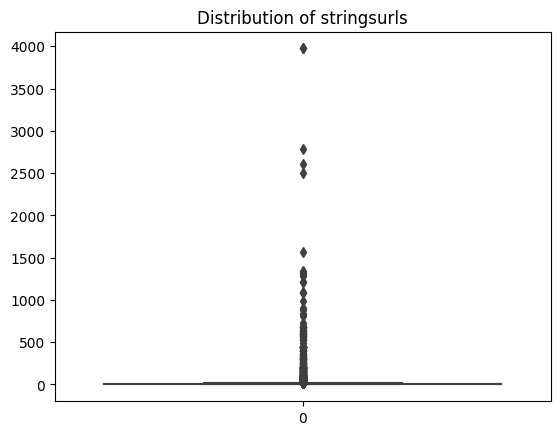

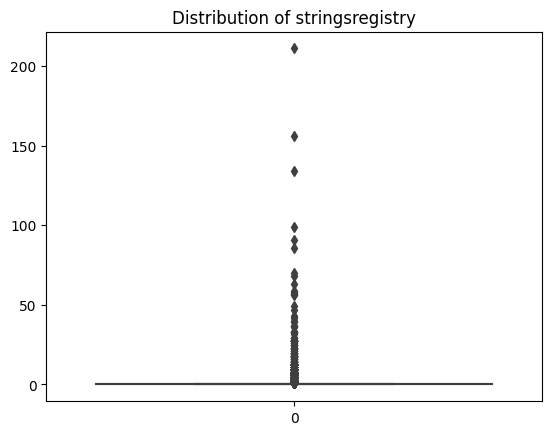

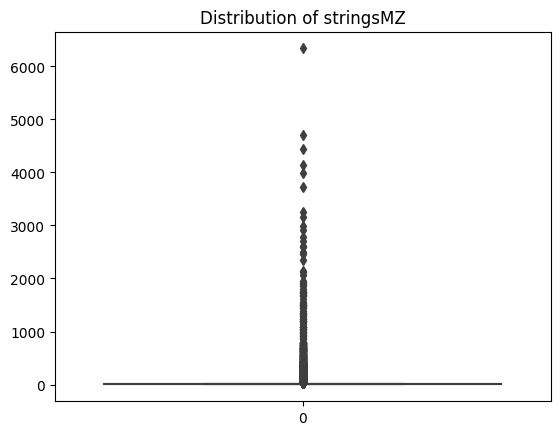

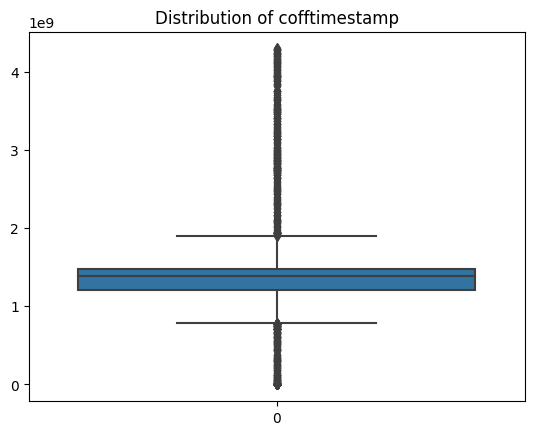

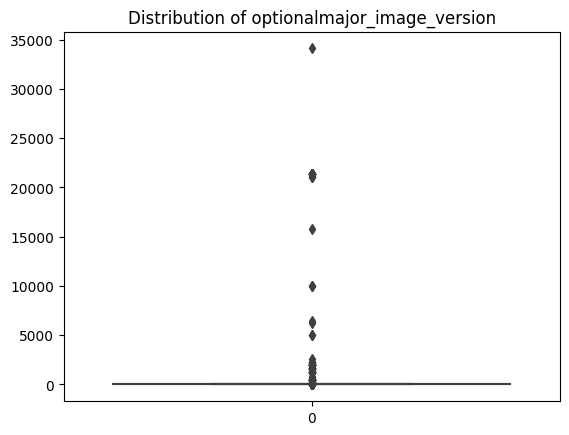

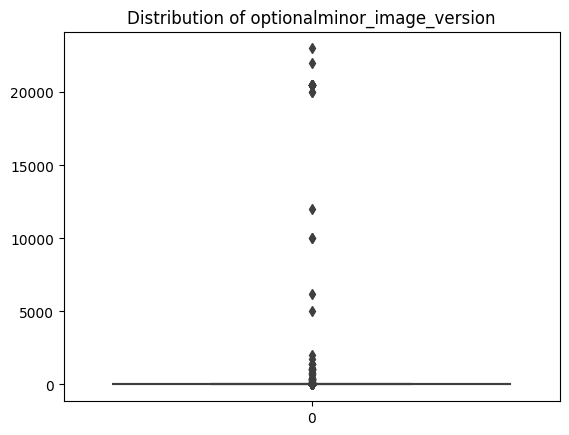

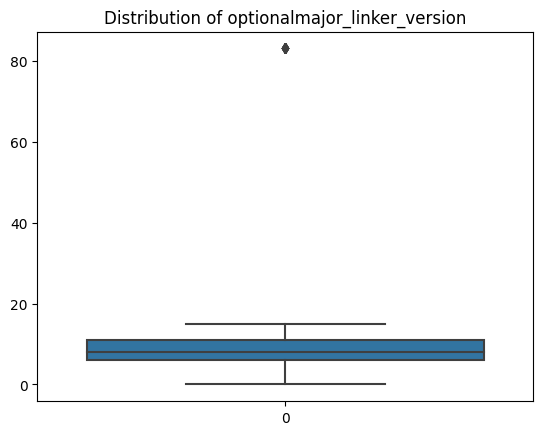

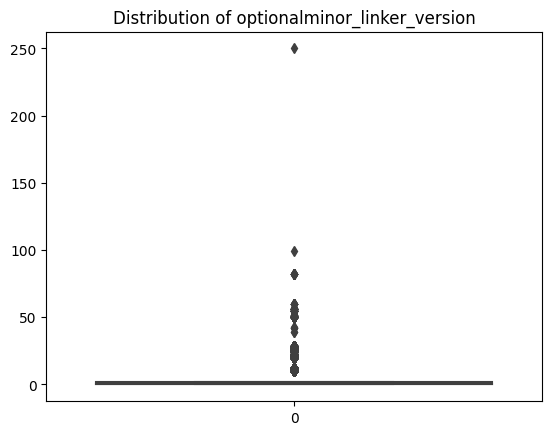

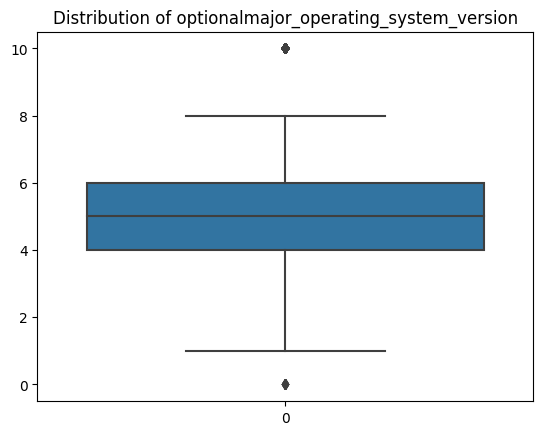

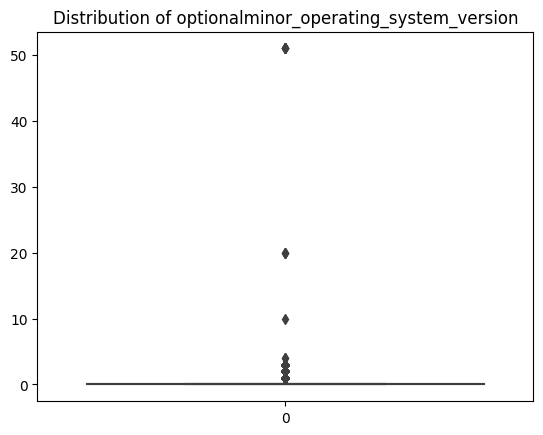

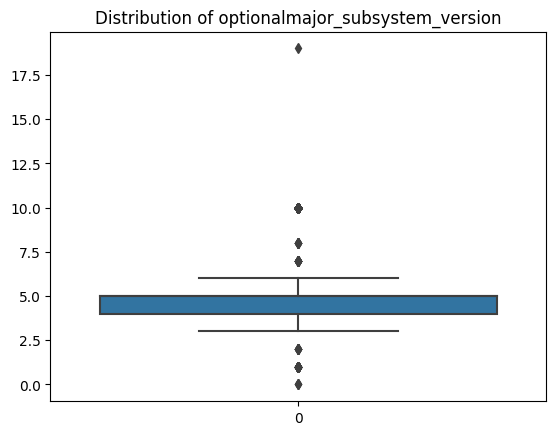

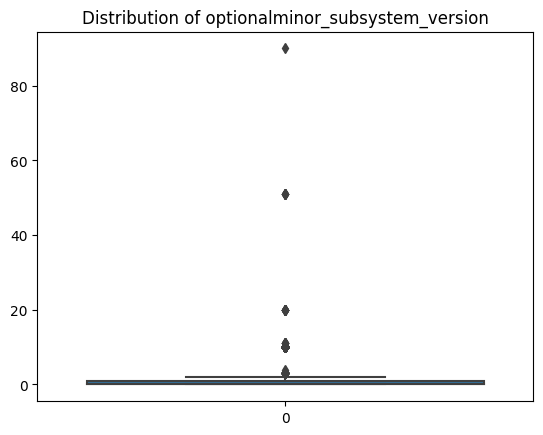

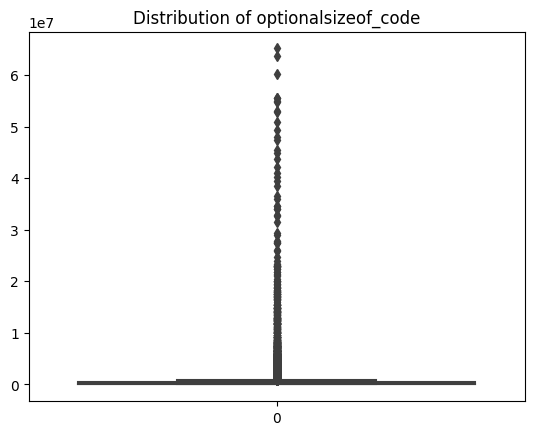

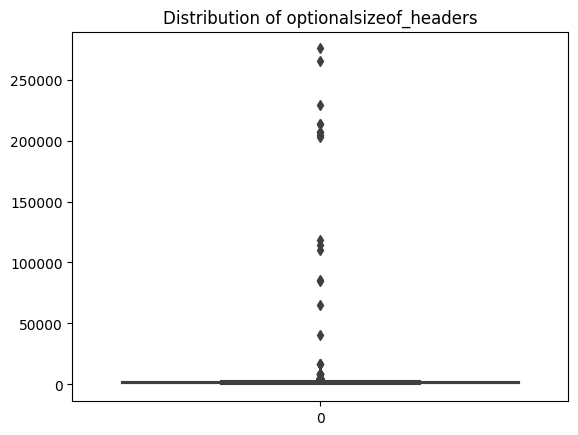

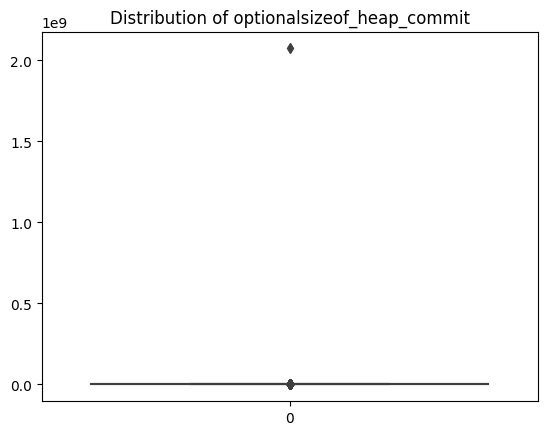

In [20]:


for column in df_training.columns:
    sns.boxplot(df_training[column])
    plt.title(f'Distribution of {column}')
    plt.show()

# Training and Testing Data Split

## Load from CSV

In [24]:
#load from csv to df
df_training_standardized = pd.read_csv('../filtered-data/standardized/training.csv')
df_testing_standardized = pd.read_csv('../filtered-data/standardized/testing.csv')


In [9]:
def train_test_split_from_dataframe(df_training, df_testing):
    X_train = df_training.drop('label', axis=1)
    y_train = df_training['label']

    X_test = df_testing.drop('label', axis=1)
    y_test = df_testing['label']

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split_from_dataframe(df_training_standardized, df_testing_standardized)


In [16]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape
# y_train.value_counts()

((21167, 41), (21167,), (110279, 41), (110279,))

# Random Forest Classifier  

In [9]:

rf = RandomForestClassifier(n_estimators=100, n_jobs=2, random_state=42, verbose=1, criterion='entropy',warm_start=True)

rf.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.0s finished


RandomForestClassifier(criterion='entropy', n_jobs=2, random_state=42,
                       verbose=1, warm_start=True)

In [10]:
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9295


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished


# Model 1 - Basic ANN

## Model

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               4200      
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dropout_4 (Dropout)         (None, 100)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dropout_5 (Dropout)         (None, 100)               0         
                                                                 
 dense_7 (Dense)             (None, 1)                

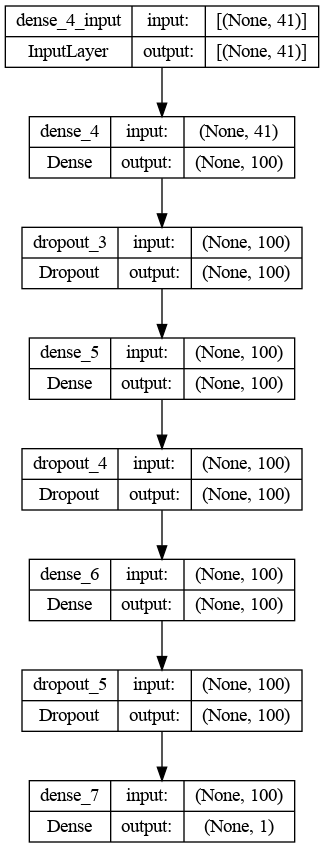

In [25]:
# write a ann model to classify 


def get_model():
    model = Sequential()
    # X_train.shape = (90164, 41)
    model.add(Dense(100, input_dim=41, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    return model

model = get_model()
# model2 = get_model2()

print(model.summary())
tf.keras.utils.plot_model(model, show_shapes=True)






## Compile and fit


In [40]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#validation accuracy chart



history = model.fit(X_train, y_train, epochs=50, batch_size=128, validation_data=(X_test, y_test), verbose=1)



Epoch 1/50
63/63 [==============================] - 1s 5ms/step - loss: 0.4729 - accuracy: 0.8306 - val_loss: 0.4182 - val_accuracy: 0.8585
Epoch 2/50
63/63 [==============================] - 0s 3ms/step - loss: 0.4650 - accuracy: 0.8326 - val_loss: 0.4235 - val_accuracy: 0.8595
Epoch 3/50
63/63 [==============================] - 0s 3ms/step - loss: 0.4619 - accuracy: 0.8354 - val_loss: 0.4268 - val_accuracy: 0.8650
Epoch 4/50
63/63 [==============================] - 0s 3ms/step - loss: 0.4589 - accuracy: 0.8393 - val_loss: 0.4226 - val_accuracy: 0.8605
Epoch 5/50
63/63 [==============================] - 0s 3ms/step - loss: 0.4595 - accuracy: 0.8409 - val_loss: 0.4237 - val_accuracy: 0.8530
Epoch 6/50
63/63 [==============================] - 0s 3ms/step - loss: 0.4589 - accuracy: 0.8339 - val_loss: 0.4156 - val_accuracy: 0.8650
Epoch 7/50
63/63 [==============================] - 0s 3ms/step - loss: 0.4565 - accuracy: 0.8374 - val_loss: 0.4246 - val_accuracy: 0.8560
Epoch 8/50
63/63 [==

## Save

In [27]:

# save model
model.save('../model/ember_model_ann.h5')

## Predict

In [28]:

y_pred = model.predict(X_test)

y_pred_real = [int(round(x[0])) for x in y_pred]
y_pred_real = np.array(y_pred_real)


63/63 [==============================] - 0s 796us/step


In [31]:
y_test.shape, y_pred.shape,y_pred_real.shape

((2000,), (2000, 1), (2000,))

## Accuracy

In [32]:
# find accuracy of the model
accuracy_score(y_test, y_pred_real)

0.8505

## Graphs

### Confusion Matrix

In [18]:
# confusion matrix



def plot_confusion_matrix(y_true, y_pred, labels, title):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    df_cm = pd.DataFrame(cm, index=labels, columns=labels)
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=True, fmt='g')
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
  
plot_confusion_matrix(y_test, y_pred_read, labels=[0, 1], title='Confusion matrix')

NameError: name 'y_pred_read' is not defined

### Default Validation

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


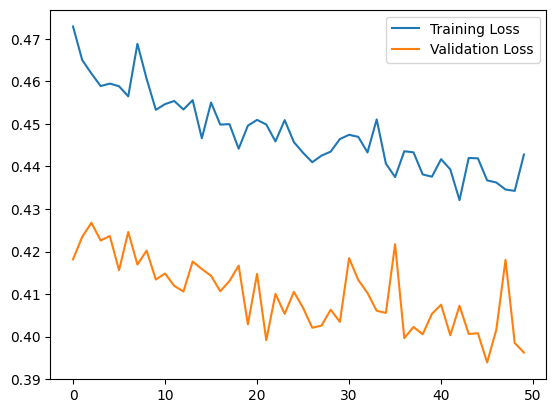

In [41]:

#get training loss
print(history.history.keys())
train_loss = history.history['loss']
#get validation loss
val_loss = history.history['val_loss']
#plot graph

plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.show()


In [37]:

#get training loss
print(model.history.history.keys())
train_loss = model.history.history['loss']
#get validation loss
val_loss = model.history.history['val_loss']
#plot graph

plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.show()


KeyError: 'loss'

#  Ensemble Model - Adaboost

## Model

In [21]:
# write xgboost model using above ann model

def get_model():
    model = Sequential()
    # X_train.shape = (90164, 41)
    model.add(Dense(100, input_dim=41, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(100, activation='relu'))
    # model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model



model= KerasClassifier(model=get_model, epochs=50, batch_size=128, verbose=1)

ada_model = AdaBoostClassifier(estimator=model, n_estimators=10, random_state=42, algorithm='SAMME')

# pipeline = Pipeline([('transformer', StandardScaler()), ('estimator', ada_model)])




## Training

In [22]:

# pipeline.fit(X_train, y_train)

ada_model.fit(X_train, y_train)


Epoch 1/50


2023-08-29 22:36:07.756992: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [21167,41]
	 [[{{node Placeholder/_10}}]]
2023-08-29 22:36:07.757342: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_12' with dtype float and shape [21167]
	 [[{{node Placeholder/_12}}]]


166/166 [==============================] - 1s 2ms/step - loss: 1.8064e-06 - accuracy: 0.9877
Epoch 2/50
166/166 [==============================] - 0s 2ms/step - loss: 5.2624e-08 - accuracy: 1.0000
Epoch 3/50
166/166 [==============================] - 0s 2ms/step - loss: 2.7533e-08 - accuracy: 1.0000
Epoch 4/50
166/166 [==============================] - 0s 2ms/step - loss: 1.4346e-08 - accuracy: 1.0000
Epoch 5/50
166/166 [==============================] - 0s 2ms/step - loss: 9.3272e-09 - accuracy: 1.0000
Epoch 6/50
166/166 [==============================] - 0s 2ms/step - loss: 8.2551e-09 - accuracy: 1.0000
Epoch 7/50
166/166 [==============================] - 0s 2ms/step - loss: 5.8386e-09 - accuracy: 1.0000
Epoch 8/50
166/166 [==============================] - 0s 2ms/step - loss: 4.2105e-09 - accuracy: 1.0000
Epoch 9/50
166/166 [==============================] - 0s 2ms/step - loss: 4.7478e-09 - accuracy: 1.0000
Epoch 10/50
166/166 [==============================] - 0s 2ms/step - loss: 

2023-08-29 22:36:23.833713: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [21167,41]
	 [[{{node Placeholder/_10}}]]
2023-08-29 22:36:23.834058: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [21167,41]
	 [[{{node Placeholder/_10}}]]


166/166 [==============================] - 0s 900us/step


AdaBoostClassifier(algorithm='SAMME',
                   estimator=KerasClassifier(batch_size=128, epochs=50, model=<function get_model at 0x7fe07971edd0>),
                   n_estimators=10, random_state=42)

## Save

In [26]:
joblib.dump(ada_model, '../model/ember_model_adaboost.joblib')

2023-08-29 22:41:21.334540: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,100]
	 [[{{node inputs}}]]
2023-08-29 22:41:21.350286: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,100]
	 [[{{node inputs}}]]
2023-08-29 22:41:21.530128: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,100]
	 [[{{node inputs}}]]
2023-08-29 22:41

INFO:tensorflow:Assets written to: ram://2ac75dc2abf94bf2a6fee9f78e4b0e9b/assets


INFO:tensorflow:Assets written to: ram://2ac75dc2abf94bf2a6fee9f78e4b0e9b/assets


['../model/ember_model_adaboost.joblib']

## Load model

In [27]:
model = joblib.load('../model/ember_model_adaboost.joblib')

2023-08-29 22:41:55.732406: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://df1f88c75306484784e4c4b645c1c50d: INVALID_ARGUMENT: ram://df1f88c75306484784e4c4b645c1c50d is a directory.


## Predict

In [28]:
y_pred = ada_model.predict(X_test)

165/862 [====>.........................] - ETA: 0s

2023-08-29 22:42:00.914339: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [110279,41]
	 [[{{node Placeholder/_10}}]]
2023-08-29 22:42:00.914685: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [110279,41]
	 [[{{node Placeholder/_10}}]]


862/862 [==============================] - 1s 857us/step


## Graphs

### Confusion Matrix


0.5213050535460061


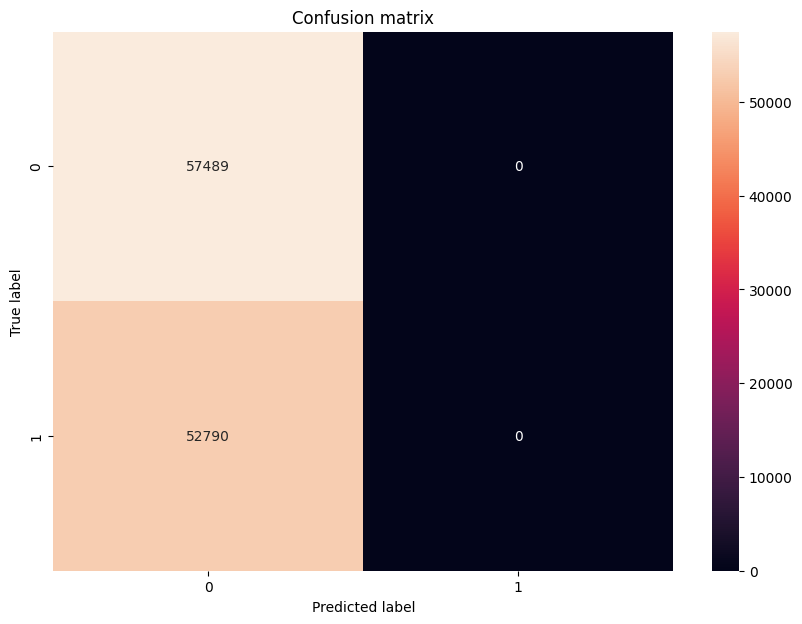

In [29]:
def plot_confusion_matrix(y_true, y_pred, labels, title):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    df_cm = pd.DataFrame(cm, index=labels, columns=labels)
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=True, fmt='g')
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
# accuracy
print(accuracy_score(y_test, y_pred.round()))

# confusion matrix
plot_confusion_matrix(y_test, y_pred.round(), labels=[0, 1], title='Confusion matrix')



### Learning curves

In [ ]:
# train_sizes, train_scores, test_scores = learning_curve(ada_model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50), verbose=1,n_iter=10)
# plt.plot(train_sizes,np.mean(train_scores,axis=1))
